In [ ]:
import os

print(os.getcwd())

c:\Users\70081796\project01_gymdata\eda


In [8]:
import pandas as pd

df = pd.read_csv('c:/Users/70081796/project01_gymdata/data/gym_members_exercise_tracking.csv')
df.head()

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

print(len(df_male), len(df_female))


511 462


Male      511
Female    462
Name: Gender, dtype: int64


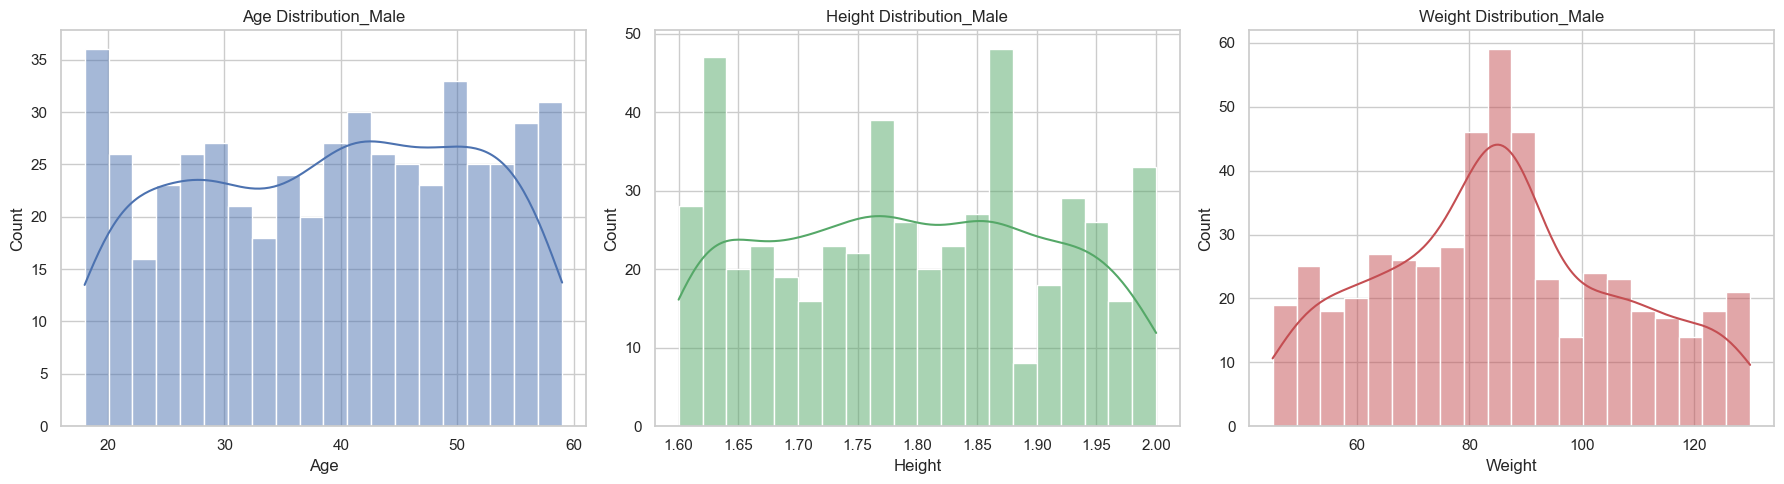

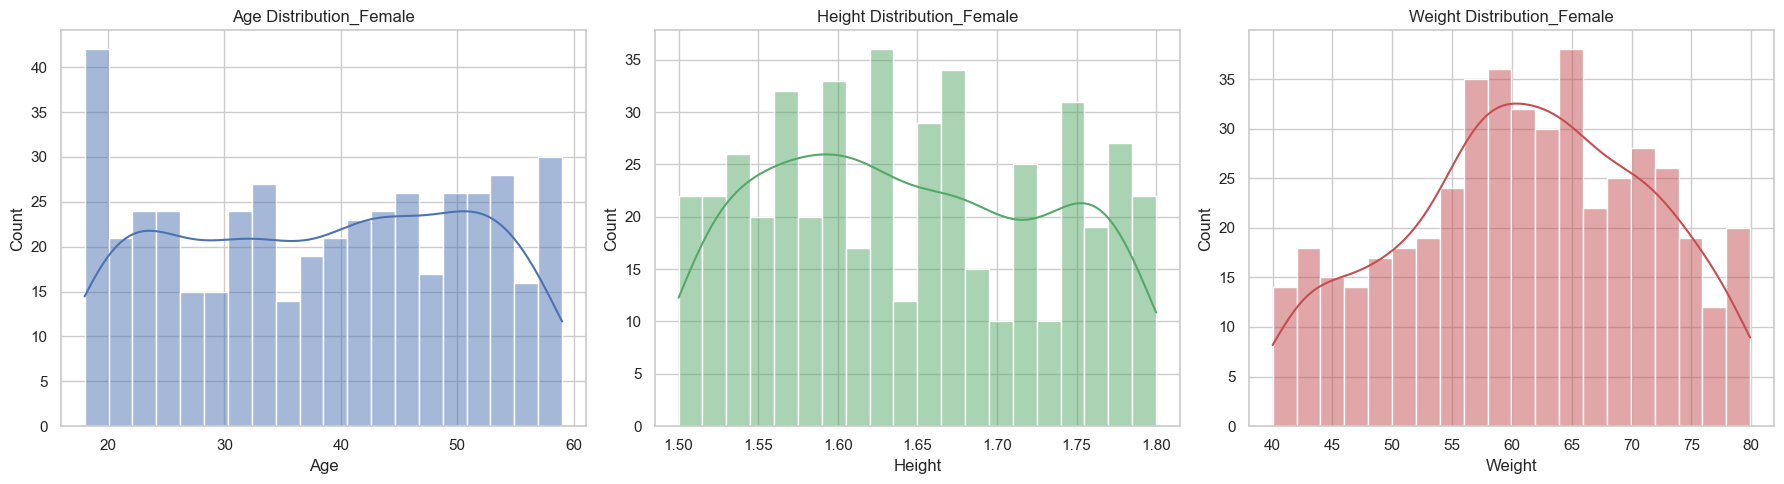

Insight
- 나이: 남성의 경우 고루고루 분포. 여성의 경우 20세 미만이 상대적으로 많음
- 키: 남녀 모두 특별한 패턴은 없음
- 몸무게: 남성의 경우 약간의 정규분포 느낌. 여성의 경우 분산이 큰 정규분포 느낌.


In [9]:
## 남녀 별로 나이, 키, 몸무게 분포 확인
# Gender 변수 table 확인
print(df['Gender'].value_counts())


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

## 남성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age
sns.histplot(df_male['Age'], kde=True, bins=20, color='#4C72B0', ax=axes[0])
axes[0].set_title('Age Distribution_Male')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Height
sns.histplot(df_male['Height (m)'], kde=True, bins=20, color='#55A868', ax=axes[1])
axes[1].set_title('Height Distribution_Male')
axes[1].set_xlabel('Height')

# Weight
sns.histplot(df_male['Weight (kg)'], kde=True, bins=20, color='#C44E52', ax=axes[2])
axes[2].set_title('Weight Distribution_Male')
axes[2].set_xlabel('Weight')

plt.tight_layout()
plt.show()


## 여성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age
sns.histplot(df_female['Age'], kde=True, bins=20, color='#4C72B0', ax=axes[0])
axes[0].set_title('Age Distribution_Female')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Height
sns.histplot(df_female['Height (m)'], kde=True, bins=20, color='#55A868', ax=axes[1])
axes[1].set_title('Height Distribution_Female')
axes[1].set_xlabel('Height')

# Weight
sns.histplot(df_female['Weight (kg)'], kde=True, bins=20, color='#C44E52', ax=axes[2])
axes[2].set_title('Weight Distribution_Female')
axes[2].set_xlabel('Weight')

plt.tight_layout()
plt.show()

print('''Insight
- 나이: 남성의 경우 고루고루 분포. 여성의 경우 20세 미만이 상대적으로 많음
- 키: 남녀 모두 특별한 패턴은 없음
- 몸무게: 남성의 경우 약간의 정규분포 느낌. 여성의 경우 분산이 큰 정규분포 느낌.''')


## Insight
- 나이: 남성의 경우 고루고루 분포. 여성의 경우 20세 미만이 상대적으로 많음
- 키: 남녀 모두 특별한 패턴은 없음
- 몸무게: 남성의 경우 약간의 정규분포 느낌. 여성의 경우 분산이 큰 정규분포 느낌

In [10]:
# Workout_Type, Experience_Level table 확인
print(df['Workout_Type'].value_counts())
print('Insight: 4가지 운동 타입이 골고루 존재함')

print()
print(df['Experience_Level'].astype('category').value_counts()) # int여서 범주형으로 변환한 후 table 확인
print('Insight: 중급과 초급이 비슷하게 대다수를 차지하고, 고급은 상대적으로 적은 편')


# 성별에 따른 Workout_Type table 확인
import pandas as pd

gender_workouttype_crosstable = pd.crosstab(df['Gender'], df['Workout_Type'])
print()
print(gender_workouttype_crosstable)
print('Insight: Cardio(유산소), HIIT(고강도인터벌), Strength(근력)의 경우 성별 상관없을 것 같았는데, Yoga의 경우 Male이 더 많은게 의아함.')

Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: Workout_Type, dtype: int64
Insight: 4가지 운동 타입이 골고루 존재함

2    406
1    376
3    191
Name: Experience_Level, dtype: int64
Insight: 중급과 초급이 비슷하게 대다수를 차지하고, 고급은 상대적으로 적은 편

Workout_Type  Cardio  HIIT  Strength  Yoga
Gender                                    
Female           126   107       123   106
Male             129   114       135   133
Insight: Cardio(유산소), HIIT(고강도인터벌), Strength(근력)의 경우 성별 상관없을 것 같았는데, Yoga의 경우 Male이 더 많은게 의아함.


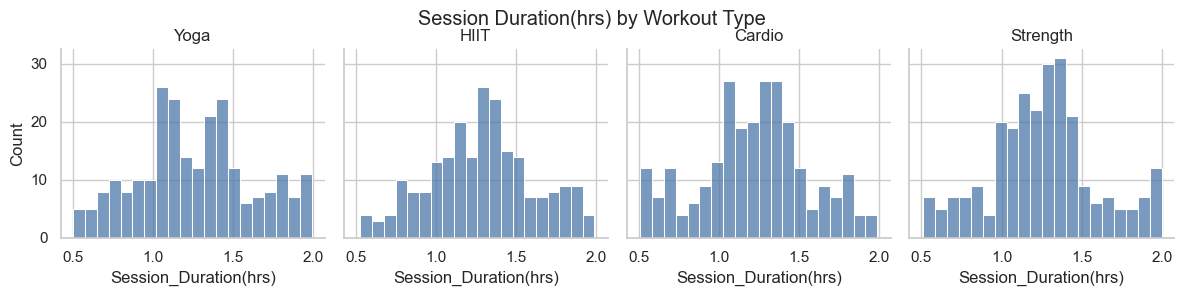

In [ ]:
# Workout_Type 별로 Session_Duration (hours) 분포 확인

order = df['Workout_Type'].unique()

g = sns.FacetGrid(df, col="Workout_Type", col_order=order, col_wrap=4, height=3, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Session_Duration (hours)", bins=20, kde=False, color="#4C78A8")
g.set_titles("{col_name}")
g.set_axis_labels("Session_Duration(hrs)", "Count")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Session Duration(hrs) by Workout Type")
plt.show()

print('Insight: 4가지 운동 모두 1시간~1.5시간 세션이 제일 많음.')

In [ ]:
# Age 변수를 10단위로 리코딩한 변수 생성해서 1) 나이대 별 키, 몸무게 확인 2) 나이대 별 Workout_Type table 확인